<a href="https://colab.research.google.com/github/kwabena369/101_testing/blob/main/ag_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AG NEWS 4-CLASS CLASSIFICATION

📊 PART 1: DATA PREPARATION

1. Loading AG News dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

✓ Using 10000 samples

2. Text statistics:
count    10000.000000
mean        37.775500
std         10.282309
min          9.000000
25%         32.000000
50%         37.000000
75%         43.000000
max        150.000000
Name: word_count, dtype: float64

3. Creating visualizations...
✓ Saved visualization: ag_news_analysis.png

4. Label distribution:
label
0    2465
1    2549
2    2471
3    2515
Name: count, dtype: int64

5. Splitting data...
Train: 7000 samples
Val: 1500 samples
Test: 1500 samples
✓ Saved CSV files


🤖 PART 2: MODEL TRAINING

1. Loading data...

2. Loading tokenizer...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


3. Tokenizing data...


Map:   0%|          | 0/7000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

✓ Tokenization complete

4. Loading model...


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded on cpu

5. Training model...
This should take ~5-10 minutes



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.478500,0.471653,0.846667,0.839966,0.877024,0.844860
200,0.353800,0.295607,0.900667,0.900090,0.900928,0.900127
300,0.295600,0.287162,0.915333,0.914302,0.918263,0.914521



📊 Metrics: Acc=0.847, F1=0.840, Prec=0.877, Rec=0.845


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



📊 Metrics: Acc=0.901, F1=0.900, Prec=0.901, Rec=0.900


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



📊 Metrics: Acc=0.915, F1=0.914, Prec=0.918, Rec=0.915


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.478500,0.471653,0.846667,0.839966,0.877024,0.844860
200,0.353800,0.295607,0.900667,0.900090,0.900928,0.900127
300,0.295600,0.287162,0.915333,0.914302,0.918263,0.914521
400,0.299300,0.264823,0.918667,0.917707,0.920816,0.917839



📊 Metrics: Acc=0.919, F1=0.918, Prec=0.921, Rec=0.918

✓ Training complete!

6. Testing on unseen data...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



📊 Metrics: Acc=0.907, F1=0.906, Prec=0.908, Rec=0.906

FINAL TEST RESULTS:
Accuracy:  0.907 (90.7%)
F1 Score:  0.906
Precision: 0.908
Recall:    0.906

7. Saving model...
✓ Model saved!

TESTING WITH REAL EXAMPLES

Predictions:

1. 'Wall Street stocks rally on strong earnings'
   → Business (95.6% confident)

2. 'Scientists discover new exoplanet'
   → Sci/Tech (96.9% confident)

3. 'Manchester United wins Premier League'
   → Sports (98.0% confident)

4. 'President announces new policy on climate change'
   → Sci/Tech (92.8% confident)

✅ PROJECT COMPLETE!

You just built a 4-class news classifier from scratch!
Your skills are leveling up! 🚀


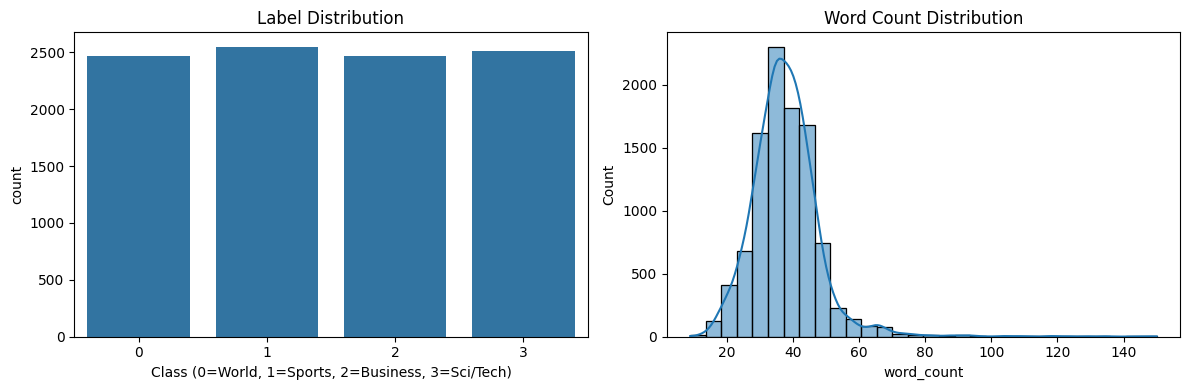

In [1]:
# AG NEWS CLASSIFICATION PROJECT
# Data Prep + Training Combined

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,  # ← Fixed: Capital A
    Trainer,
    TrainingArguments
)
import torch

print("="*50)
print("AG NEWS 4-CLASS CLASSIFICATION")
print("="*50)

# ===== PART 1: DATA PREPARATION =====
print("\n📊 PART 1: DATA PREPARATION")

# Load dataset
print("\n1. Loading AG News dataset...")
dataset = load_dataset("ag_news")
df = pd.DataFrame(dataset['train'])

# Sample for quick experiments
df = df.sample(10000, random_state=42)
df = df.dropna()
print(f"✓ Using {len(df)} samples")

# Text analysis
df['text_count'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("\n2. Text statistics:")
print(df['word_count'].describe())

# Visualizations
print("\n3. Creating visualizations...")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Class (0=World, 1=Sports, 2=Business, 3=Sci/Tech)')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')

plt.tight_layout()
plt.savefig('ag_news_analysis.png')
print("✓ Saved visualization: ag_news_analysis.png")

# Label distribution
print("\n4. Label distribution:")
print(df['label'].value_counts().sort_index())

# Rename column for Trainer
df = df.rename(columns={"label": "labels"})

# Split data
print("\n5. Splitting data...")
train_df, temp = train_test_split(df, test_size=0.3, random_state=42, stratify=df['labels'])
test_df, val_df = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp['labels'])

print(f"Train: {len(train_df)} samples")
print(f"Val: {len(val_df)} samples")
print(f"Test: {len(test_df)} samples")

# Save CSVs
train_df.to_csv('ag_news_train.csv', index=False)
test_df.to_csv('ag_news_test.csv', index=False)
val_df.to_csv('ag_news_val.csv', index=False)
print("✓ Saved CSV files")

# ===== PART 2: MODEL TRAINING =====
print("\n\n🤖 PART 2: MODEL TRAINING")

# Load CSVs and convert to Dataset
print("\n1. Loading data...")
train_dataset = Dataset.from_pandas(train_df[['text', 'labels']])
val_dataset = Dataset.from_pandas(val_df[['text', 'labels']])
test_dataset = Dataset.from_pandas(test_df[['text', 'labels']])

# Load tokenizer
print("\n2. Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenization function
def tokenize_function(text_content):
    return tokenizer(
        text_content['text'],
        padding='max_length',
        truncation=True,
        max_length=128  # Perfect for AG News!
    )

# Apply tokenization
print("\n3. Tokenizing data...")
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
print("✓ Tokenization complete")

# Compute metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Use 'macro' for balanced multi-class data
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='macro', zero_division=0
    )
    acc = accuracy_score(labels, preds)

    print(f"\n📊 Metrics: Acc={acc:.3f}, F1={f1:.3f}, Prec={precision:.3f}, Rec={recall:.3f}")

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Load model
print("\n4. Loading model...")
model = AutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=4  # 4 classes!
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"✓ Model loaded on {device}")

# Training arguments
training_args = TrainingArguments(
    output_dir='./results_agnews',
    num_train_epochs=1,
    eval_strategy="steps",  # ← Fixed typo
    eval_steps=100,
    save_steps=100,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=100,
    logging_steps=50,
    report_to="none",
    load_best_model_at_end=True,
    metric_for_best_model="f1",  # ← Fixed typo
    save_total_limit=2
)

# Create trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # ← Fixed: added comma
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train!
print("\n5. Training model...")
print("This should take ~5-10 minutes\n")
trainer.train()

print("\n✓ Training complete!")

# Evaluate on test set
print("\n6. Testing on unseen data...")
test_results = trainer.evaluate(test_dataset)

print("\n" + "="*50)
print("FINAL TEST RESULTS:")
print("="*50)
print(f"Accuracy:  {test_results['eval_accuracy']:.3f} ({test_results['eval_accuracy']*100:.1f}%)")
print(f"F1 Score:  {test_results['eval_f1']:.3f}")
print(f"Precision: {test_results['eval_precision']:.3f}")
print(f"Recall:    {test_results['eval_recall']:.3f}")

# Save model
print("\n7. Saving model...")
model.save_pretrained('./ag_news_classifier')
tokenizer.save_pretrained('./ag_news_classifier')

# Save model info
import json
model_info = {
    'model_name': 'distilbert-base-uncased',
    'num_labels': 4,
    'max_length': 128,
    'test_accuracy': test_results['eval_accuracy'],
    'test_f1': test_results['eval_f1'],
    'label_map': {
        0: 'World',
        1: 'Sports',
        2: 'Business',
        3: 'Sci/Tech'
    }
}

with open('./ag_news_classifier/model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)

print("✓ Model saved!")

# ===== TEST WITH EXAMPLES =====
print("\n" + "="*50)
print("TESTING WITH REAL EXAMPLES")
print("="*50)

def predict_category(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        prediction = outputs.logits.argmax(-1).item()
        confidence = torch.softmax(outputs.logits, dim=-1).max().item()

    categories = ['World', 'Sports', 'Business', 'Sci/Tech']
    return categories[prediction], confidence

# Test examples
test_examples = [
    "Wall Street stocks rally on strong earnings",
    "Scientists discover new exoplanet",
    "Manchester United wins Premier League",
    "President announces new policy on climate change"
]

print("\nPredictions:")
for i, text in enumerate(test_examples, 1):
    category, confidence = predict_category(text)
    print(f"\n{i}. '{text}'")
    print(f"   → {category} ({confidence*100:.1f}% confident)")

print("\n" + "="*50)
print("✅ PROJECT COMPLETE!")
print("="*50)
print("\nYou just built a 4-class news classifier from scratch!")
print("Your skills are leveling up! 🚀")

In [3]:
# this is the testng of the model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Choose which ch7778=============================================================================================eckpoint to test
checkpoint_path = './results_agnews/checkpoint-400'  # ← Change number here!

print(f"Loading checkpoint: {checkpoint_path}")

# Load model from checkpoint
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_path)

# Load tokenizer (use original, not from checkpoint)
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()  # Set to evaluation mode



Loading checkpoint: ./results_agnews/checkpoint-400


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
